In [67]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [68]:
exp_filenames = ["ALU_ST_N_RUPT", "PLA_ST_N_RUPT", "BOIS_ST_L_RUPT", "BOIS_ST_T_RUPT"]

In [69]:
# read files .info
# Initialize an empty dictionary to store the item values

exp_items_values = []

for exp_filename in exp_filenames:

    item_values = {}

    with open(exp_filename + ".info", "r") as file:

        # Read each line in the file
        for line in file:
            # Split the line into item and value
            item, value = line.strip().split(":")

            # Store the value in the dictionary with the item name as the key
            item_values[item.strip()] = float(value.strip())

    # Store the item values in the list
    exp_items_values.append(item_values)

for exp_name, exp_item_values in zip(exp_filenames, exp_items_values):
    print(f"{exp_name}: {exp_item_values}")

ALU_ST_N_RUPT: {'E': 70891.5, 'Rp02': 175.467, 'Rm': 296.488, 'Au': 0.157127, 'A': -1.0, 'strain rate': -1.0}
PLA_ST_N_RUPT: {'E': 3260.86, 'Rp02': 35.2174, 'Rm': 47.9696, 'Au': 0.00415421, 'A': -1.0, 'strain rate': -1.0, 'Adjustment Factor Eps': 0.93}
BOIS_ST_L_RUPT: {'E': 5062.92, 'Rp02': 20.5022, 'Rm': 20.5203, 'Au': 0.0, 'A': -1.0, 'strain rate': -1.0, 'eps to rm': 0.00398445}
BOIS_ST_T_RUPT: {'E': 9477.27, 'Rp02': 26.8557, 'Rm': 27.339, 'Au': -5.69692e-05, 'A': -1.0, 'strain rate': -1.0, 'eps to rm': 0.00284869}


In [70]:
# read -identification.info for ALU and PLA
# contain Johnson Cook Laws

filenames = [
    f"{exp_filename}-identification.info" for exp_filename in exp_filenames[:2]
]
dicts = [{} for _ in range(2)]

for filename, dictionary in zip(filenames, dicts):
    with open(filename, "r") as file:
        for line in file:
            item, value = line.strip().split(":")
            dictionary[item.strip()] = float(value.strip())


# print the dictionaries
for filename, dictionary in zip(filenames, dicts):
    print(f"{filename}: {dictionary}")

ALU_ST_N_RUPT-identification.info: {'A': 122.419, 'B': 470.094, 'n': 0.3785, 'r2': 0.997159}
PLA_ST_N_RUPT-identification.info: {'A': 1.32914, 'B': 838.939, 'n': 0.509188, 'r2': 0.969027}


In [71]:
def JC_law(x, A, B, n):
    return A + B * x**n


# given the Young Modulus, the stress at 0.02% and the Johnson Cook parameters, recreate the strain-stress curve
def strain_stress_curve(E, Rp02, eps02, A, B, n):
    # define the strain
    strain = np.linspace(0, 0.15, 1000)
    stress = np.zeros_like(strain)
    # define the stress
    idx_eps02 = np.argmin(np.abs(strain - eps02)) - 3  # index of the strain at 0.02%

    stress[:idx_eps02] = E * strain[:idx_eps02]
    stress[idx_eps02:] = JC_law(strain[idx_eps02:] - eps02, A, B, n)

    return strain, stress

70891.5 122.419 470.094 0.3785
3260.86 1.32914 838.939 0.509188


C:\Users\Jules\AppData\Local\Temp\ipykernel_9824\1706902464.py:2: RuntimeWarning: invalid value encountered in power
  return A + B * x**n


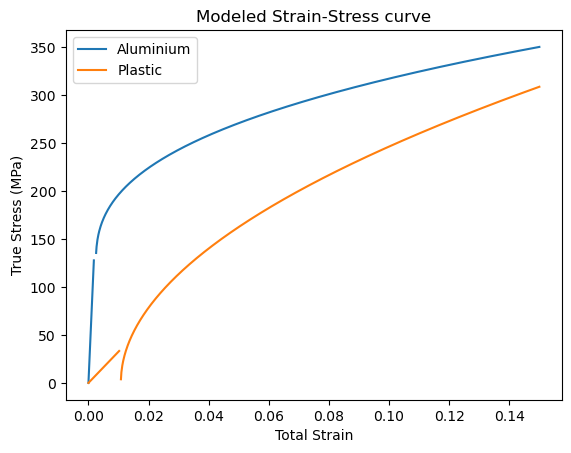

In [72]:
materials = ["Aluminium", "Plastic"]
for i, material in enumerate(materials):
    E = exp_items_values[i]["E"]
    Rp02 = exp_items_values[i]["Rp02"]
    eps02 = Rp02 / E
    A, B, n = dicts[i]["A"], dicts[i]["B"], dicts[i]["n"]
    print(E, A, B, n)

    strain, stress = strain_stress_curve(E, Rp02, eps02, A, B, n)

    plt.plot(strain, stress, label=material)

plt.xlabel("Total Strain")
plt.ylabel("True Stress (MPa)")
plt.legend()
plt.title("Modeled Strain-Stress curve")
plt.show()